In [1]:
"""
Author: Kaio Henrique de Sousa
Date: May 2022
"""

import logging
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

#config logging
logging.basicConfig(
    filename='./results.log',
    level=logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')

In [2]:
def read_dataset(file_path):
    """ Read data from csv

    Args:
      file_path (str): file path to read

    Returns:
      data (DataFrame): returns file read as a dataframe.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except: # pylint: disable=bare-except
        logging.error("There is no such %s", file_path)
    return None

exchange_rates = read_dataset('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [4]:
exchange_rates.rename(columns={'[Brazilian real ]': 'BR_real', # pylint: disable=E1101
                               'Period\\Unit:': 'Time'},
                      inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True) # pylint: disable=E1101
exchange_rates.head(5) # pylint: disable=E1101

,Time,[Australian dollar ],[Bulgarian lev ],BR_real,[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [5]:
#Selecionando apenas os dados a serem utilizados
euro_to_real = exchange_rates[['Time', 'BR_real']] # pylint: disable=E1136  # pylint/issues/3139
euro_to_real.head(5)

,Time,BR_real
0,1999-01-04,NaN
1,1999-01-05,NaN
2,1999-01-06,NaN
3,1999-01-07,NaN
4,1999-01-08,NaN


In [6]:
# limpando dados
euro_to_real = euro_to_real[euro_to_real['BR_real'] != '-']

In [7]:
euro_to_real['BR_real'].value_counts()

3.0909    4
3.3232    4
3.3277    4
3.2395    4
2.7570    4
         ..
2.7312    1
2.6930    1
2.6955    1
2.7236    1
6.5748    1
Name: BR_real, Length: 4853, dtype: int64

In [8]:
euro_to_real['BR_real'] = euro_to_real['BR_real'].astype('float')
euro_to_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5638 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     5638 non-null   datetime64[ns]
 1   BR_real  5370 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


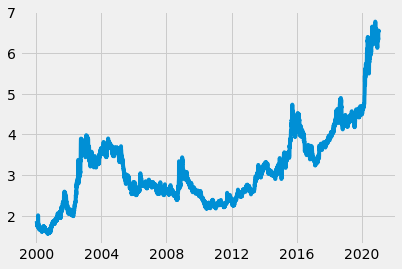

In [9]:
style.use('fivethirtyeight')
plt.plot(euro_to_real['Time'],
        euro_to_real['BR_real'])

plt.show()

In [10]:
# Média móvel
euro_to_real['rolling_mean'] = euro_to_real['BR_real'].rolling(30).mean()
euro_to_real.tail(5)

,Time,BR_real,rolling_mean
5694,2021-01-04,6.3241,6.291593
5695,2021-01-05,6.5517,6.298827
5696,2021-01-06,6.5119,6.303240
5697,2021-01-07,6.5172,6.307337
5698,2021-01-08,6.5748,6.314330


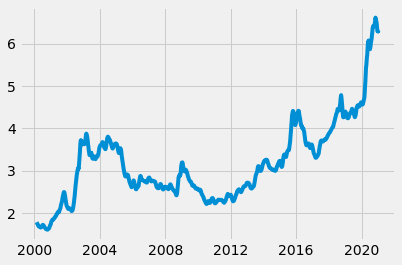

In [11]:
plt.plot(euro_to_real['Time'],
        euro_to_real['rolling_mean'])

plt.show()

In [12]:
lula_dilma_bolsonaro = euro_to_real[(euro_to_real.Time.dt.year >= 2003)
               & (euro_to_real.Time.dt.year < 2021)]

In [13]:
lula = euro_to_real[(euro_to_real.Time.dt.year >= 2003)
               & (euro_to_real.Time.dt.year < 2011)]

In [14]:
dilma_temer = euro_to_real[(euro_to_real.Time.dt.year >= 2011)
                       & (euro_to_real.Time.dt.year < 2019)]

In [15]:
bolsonaro = euro_to_real[(euro_to_real.Time.dt.year >= 2019)
               & (euro_to_real.Time.dt.year < 2021)]

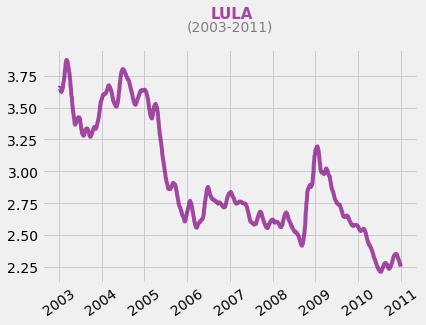

In [25]:
fig_lula, ax_lula = plt.subplots()
ax_lula.plot(lula['Time'],
         lula['rolling_mean'],
         color='purple', alpha=0.7)

ax_lula.text(x=732512, y=4.2, s='LULA',
         color='purple', weight='bold',
         size=15, alpha=0.7)
ax_lula.text(x=732312, y=4.1, s='(2003-2011)', color='gray')

plt.xticks(rotation=35)

#plt.savefig('underLula.png', format='png')
plt.show()

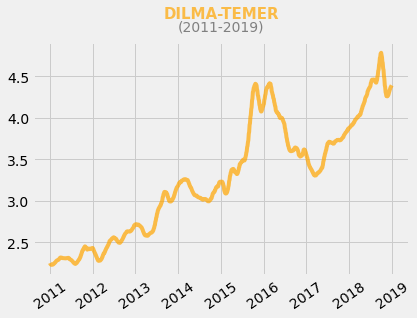

In [26]:
fig_dilma_temer, ax_dilma_temer = plt.subplots()
ax_dilma_temer.plot(dilma_temer['Time'],
         dilma_temer['rolling_mean'],
         color='orange', alpha=0.7)

ax_dilma_temer.text(x=735114, y=5.2, s='DILMA-TEMER',
         color='orange', weight='bold',
         size=15, alpha=0.7)
ax_dilma_temer.text(x=735234, y=5.05, s='(2011-2019)', color='gray')

plt.xticks(rotation=35)

#plt.savefig('underDilma-Temer.png', format='png')
plt.show()

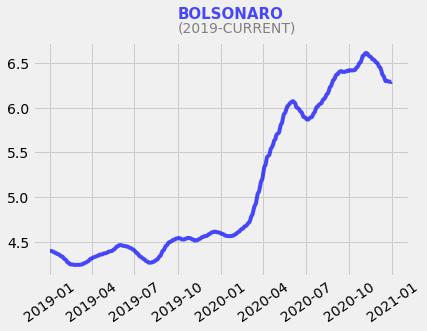

In [27]:
fig_bolsonaro, ax_bolsonaro = plt.subplots()
ax_bolsonaro.plot(bolsonaro['Time'],
         bolsonaro['rolling_mean'],
         color='blue', alpha=0.7)

ax_bolsonaro.text(x=737333, y=7, s='BOLSONARO',
         color='blue', weight='bold',
         size=15, alpha=0.7)
ax_bolsonaro.text(x=737333, y=6.85, s='(2019-CURRENT)', color='gray')

plt.xticks(rotation=35)

#plt.savefig('underBolsonaro.png', format='png')
plt.show()

In [19]:
ax_bolsonaro.get_xticks()

array([737060., 737150., 737241., 737333., 737425., 737516., 737607.,
       737699., 737791.])

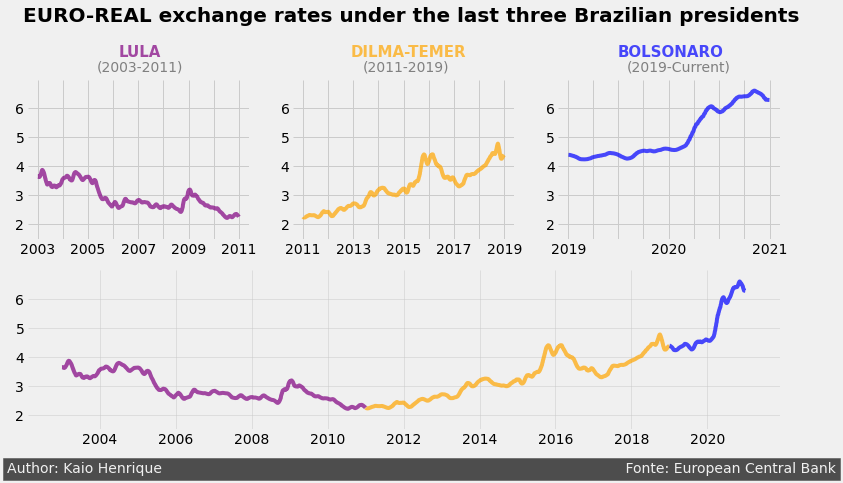

In [28]:
style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    for location in ['top', 'right', 'bottom', 'left']:
        ax.spines[location].set_visible(False)
        ax.set_ylim(1.5, 7)
        ax.set_yticks([2, 3, 4, 5, 6])
        ax.set_yticklabels(['2', '3', '4', '5', '6'])
        ax.grid(0.5)

ax1.plot(lula['Time'],
         lula['rolling_mean'],
         color='purple', alpha=0.7)

ax2.plot(dilma_temer['Time'],
         dilma_temer['rolling_mean'],
         color='orange', alpha=0.7)

ax3.plot(bolsonaro['Time'],
         bolsonaro['rolling_mean'],
         color='blue', alpha=0.7)

ax1.text(x=732390, y=7.8, s='LULA',
         color='purple', weight='bold',
         size=15, alpha=0.7)
ax1.text(x=732070, y=7.3, s='(2003-2011)', color='gray')
ax1.set_xticklabels(['', '2003', '', '2005', '',
                     '2007', '', '2009', '',
                     '2011'])

ax2.text(x=734829, y=7.8, s='DILMA-TEMER',
         color='orange', weight='bold',
         size=15, alpha=0.7)
ax2.text(x=734999, y=7.3, s='(2011-2019)', color='gray')
ax2.set_xticklabels(['', '2011', '', '2013',
                     '', '2015', '', '2017',
                     '', '2019'])

ax3.text(x=737241, y=7.8, s='BOLSONARO',
         color='blue', weight='bold',
         size=15, alpha=0.7)
ax3.text(x=737271, y=7.3, s='(2019-Current)', color='gray')
ax3.set_xticklabels(['2019', '', '', '',
                     '2020', '', '', '',
                     '2021'])

ax4.plot(lula['Time'], lula['rolling_mean'],
        color='purple', alpha=0.7)
ax4.plot(dilma_temer['Time'], dilma_temer['rolling_mean'],
        color='orange', alpha=0.7)
ax4.plot(bolsonaro['Time'], bolsonaro['rolling_mean'],
        color='blue', alpha=0.7)
ax4.grid(alpha=0.5)

ax1.text(x=731000, y=9,
         s='EURO-REAL exchange rates under the last three Brazilian presidents',
         fontsize=20, weight='bold')

ax4.text(730690, 0.0, 'Author: Kaio Henrique' + ' '*103 + 'Fonte: European Central Bank',
         color='#f0f0f0', backgroundcolor='#4d4d4d', size=14)

#plt.savefig('underThree.png', format='png')
plt.show()
